In [2]:
print("hello world")

hello world


In [3]:
#@markdown We implemented some functions to visualize the gesture recognition results. <br/> Run the following cell to activate the functions.
from matplotlib import pyplot as plt
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'xtick.labelbottom': False,
    'xtick.bottom': False,
    'ytick.labelleft': False,
    'ytick.left': False,
    'xtick.labeltop': False,
    'xtick.top': False,
    'ytick.labelright': False,
    'ytick.right': False
})

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles


def display_one_image(image, title, subplot, titlesize=16):
    """Displays one image along with the predicted category name and score."""
    plt.subplot(*subplot)
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize), color='black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)


def display_batch_of_images_with_gestures_and_hand_landmarks(images, results):
    """Displays a batch of images with the gesture category and its score along with the hand landmarks."""
    # Images and labels.
    images = [image.numpy_view() for image in images]
    gestures = [top_gesture for (top_gesture, _) in results]
    multi_hand_landmarks_list = [multi_hand_landmarks for (_, multi_hand_landmarks) in results]

    # Auto-squaring: this will drop data that does not fit into square or square-ish rectangle.
    rows = int(math.sqrt(len(images)))
    cols = len(images) // rows

    # Size and spacing.
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols, 1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))

    # Display gestures and hand landmarks.
    for i, (image, gestures) in enumerate(zip(images[:rows*cols], gestures[:rows*cols])):
        title = f"{gestures.category_name} ({gestures.score:.2f})"
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols) * 40 + 3
        annotated_image = image.copy()

        for hand_landmarks in multi_hand_landmarks_list[i]:
          hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
          hand_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
          ])

          mp_drawing.draw_landmarks(
            annotated_image,
            hand_landmarks_proto,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

        subplot = display_one_image(annotated_image, title, subplot, titlesize=dynamic_titlesize)

    # Layout.
    plt.tight_layout()
    plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()


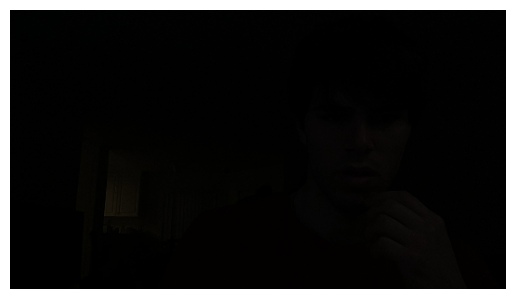

In [4]:
import cv2
import matplotlib.pyplot as plt
import math

def resize_and_show(image):
    h, w, _ = image.shape
    DESIRED_HEIGHT = 300  # Replace with your desired height

    if h <= DESIRED_HEIGHT:
        img = image
    else:
        img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

# Your existing code to capture and read the frame
cap = cv2.VideoCapture(0)
ret, frame = cap.read()

resize_and_show(frame)


In [5]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [6]:
# create gesture recognizer object
base_options = python.BaseOptions(model_asset_path='gesture_recognizer.task')
options = vision.GestureRecognizerOptions(base_options=base_options)
recognizer = vision.GestureRecognizer.create_from_options(options)

I0000 00:00:1705107850.521603       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 76.3), renderer: Apple M1
W0000 00:00:1705107850.528862       1 gesture_recognizer_graph.cc:129] Hand Gesture Recognizer contains CPU only ops. Sets HandGestureRecognizerGraph acceleration to Xnnpack.
I0000 00:00:1705107850.534185       1 hand_gesture_recognizer_graph.cc:250] Custom gesture classifier is not defined.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


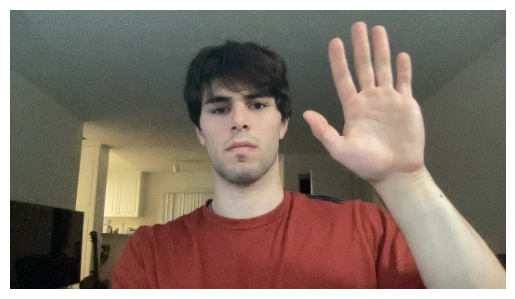

In [7]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()

resize_and_show(frame)

[NormalizedLandmark(x=0.7859419584274292, y=0.5868078470230103, z=1.511604637016717e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.7197559475898743, y=0.5707154273986816, z=-0.02849056012928486, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.666296124458313, y=0.5042074918746948, z=-0.04121651127934456, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6347160935401917, y=0.4328647553920746, z=-0.05157964304089546, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6064327359199524, y=0.38348475098609924, z=-0.06166267767548561, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6949952244758606, y=0.3464144170284271, z=-0.019087301567196846, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6717706322669983, y=0.24647705256938934, z=-0.03392476215958595, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6621087789535522, y=0.18342961370944977, z=-0.04858403652906418, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6563187837600708, y=0.127946

NameError: name 'SPACING' is not defined

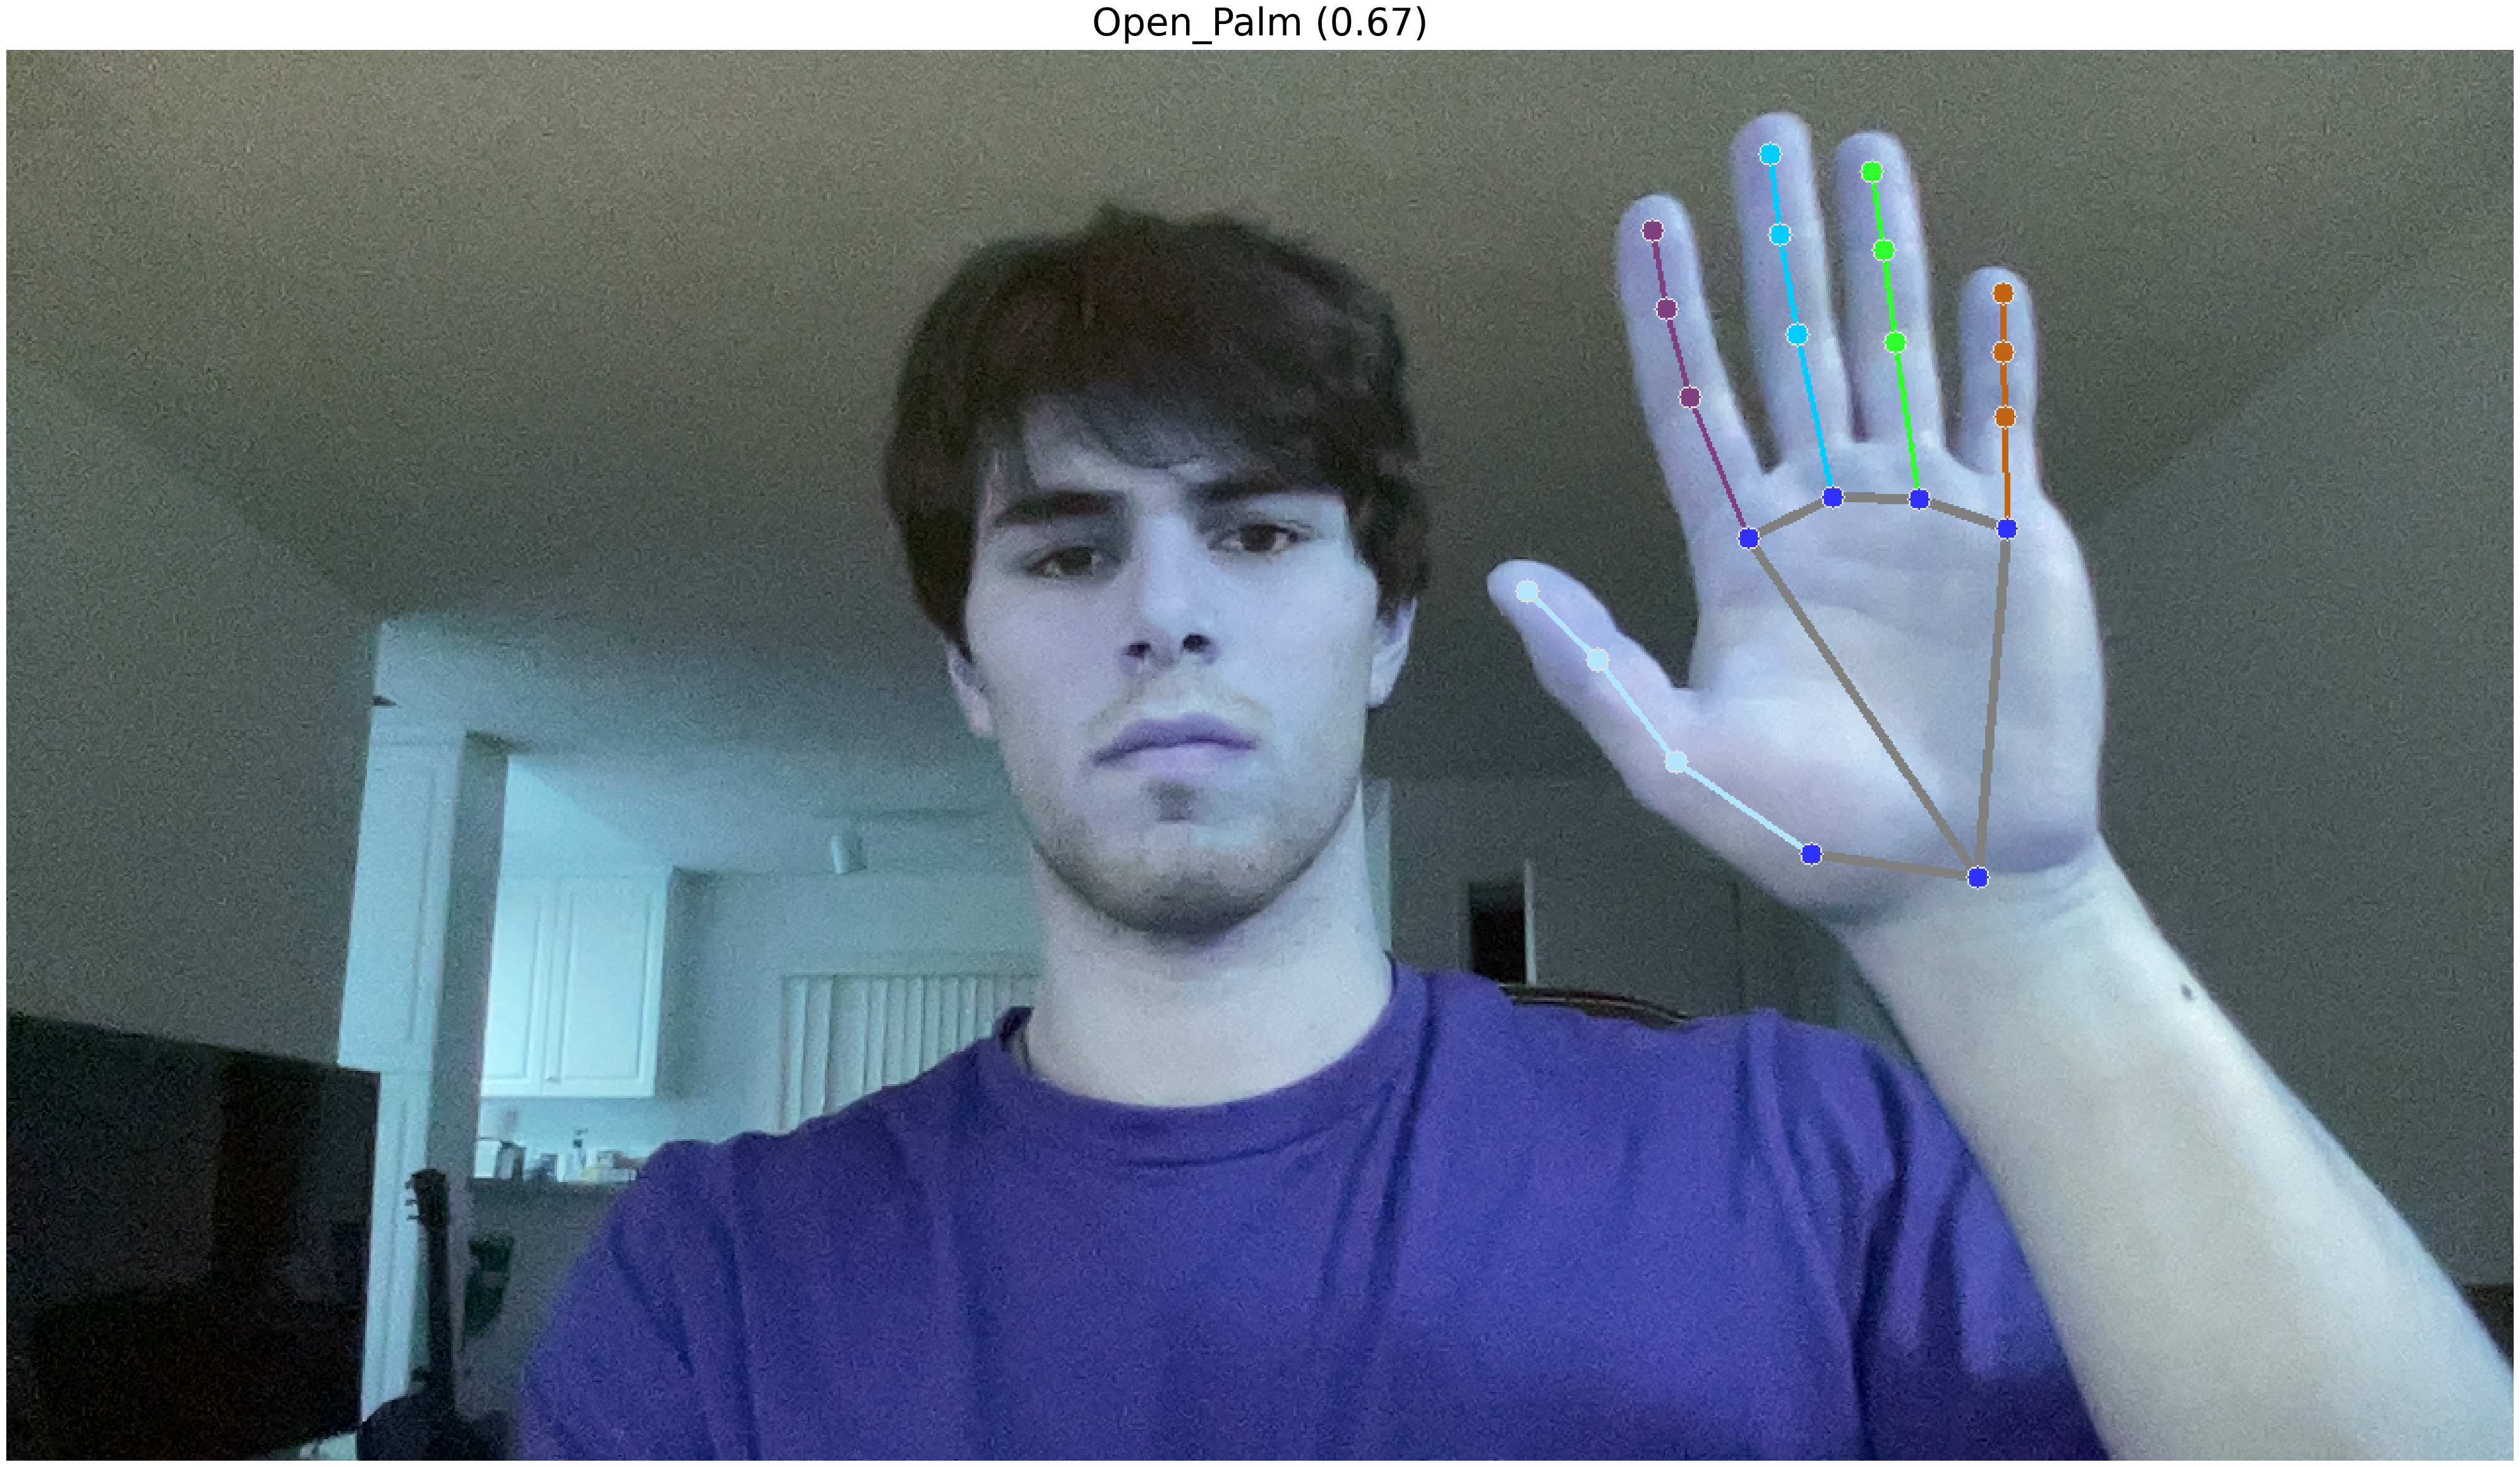

In [8]:


# recognize the image
mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)
recognition_result = recognizer.recognize(mp_image)


# display model results
if recognition_result.gestures:
    top_gesture = recognition_result.gestures[0][0]
    hand_landmarks = recognition_result.hand_landmarks[0]
    print(hand_landmarks)
    print(top_gesture)

# annotate the image
cv_image = mp_image.numpy_view()
annotated_image = cv_image.copy()
    
gesture = recognition_result.gestures
landmarks = recognition_result.hand_landmarks


hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
hand_landmarks_proto.landmark.extend([
landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
])

# Size and spacing.

subplot=(1,1, 1)
plt.figure(figsize=(40,40))

# Display gestures and hand landmarks.

title = f"{top_gesture.category_name} ({top_gesture.score:.2f})"
dynamic_titlesize = 40 + 3
annotated_image = frame.copy()
hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
hand_landmarks_proto.landmark.extend([
landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
])

mp_drawing.draw_landmarks(
annotated_image,
hand_landmarks_proto,
mp_hands.HAND_CONNECTIONS,
mp_drawing_styles.get_default_hand_landmarks_style(),
mp_drawing_styles.get_default_hand_connections_style())

subplot = display_one_image(annotated_image, title, subplot, titlesize=dynamic_titlesize)

# Layout.
plt.tight_layout()
plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
plt.show()